# Linear Regression Theory

Linear regression is a basic and commonly used type of predictive analysis.

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).

Our goal with linear regression is to minimaze the vertical distance btw all data points and our line

Lots of way how to minimaze:\
    sum of squared errors\
    sum of absolute errors -all these methods just minimaze the distance in general

Least square methods: is fitted by minimazing the os square of residuals\
                        residuals are the difference btw the observation (y value) and and the fitted line 
    

In [1]:
#housing data, try to predict housing price based on the its feature
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#read csv as dataframe using pandas
df=pd.read_csv('/Users/Taninka/Downloads/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/USA_Housing.csv')

In [4]:
df.head() #show header of dataframe

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
#show info about dataframe, # of columns, #null values, data types..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
#quick account of statistical info about dataframe -adress column is not available cause it is string
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
#show names of columns
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

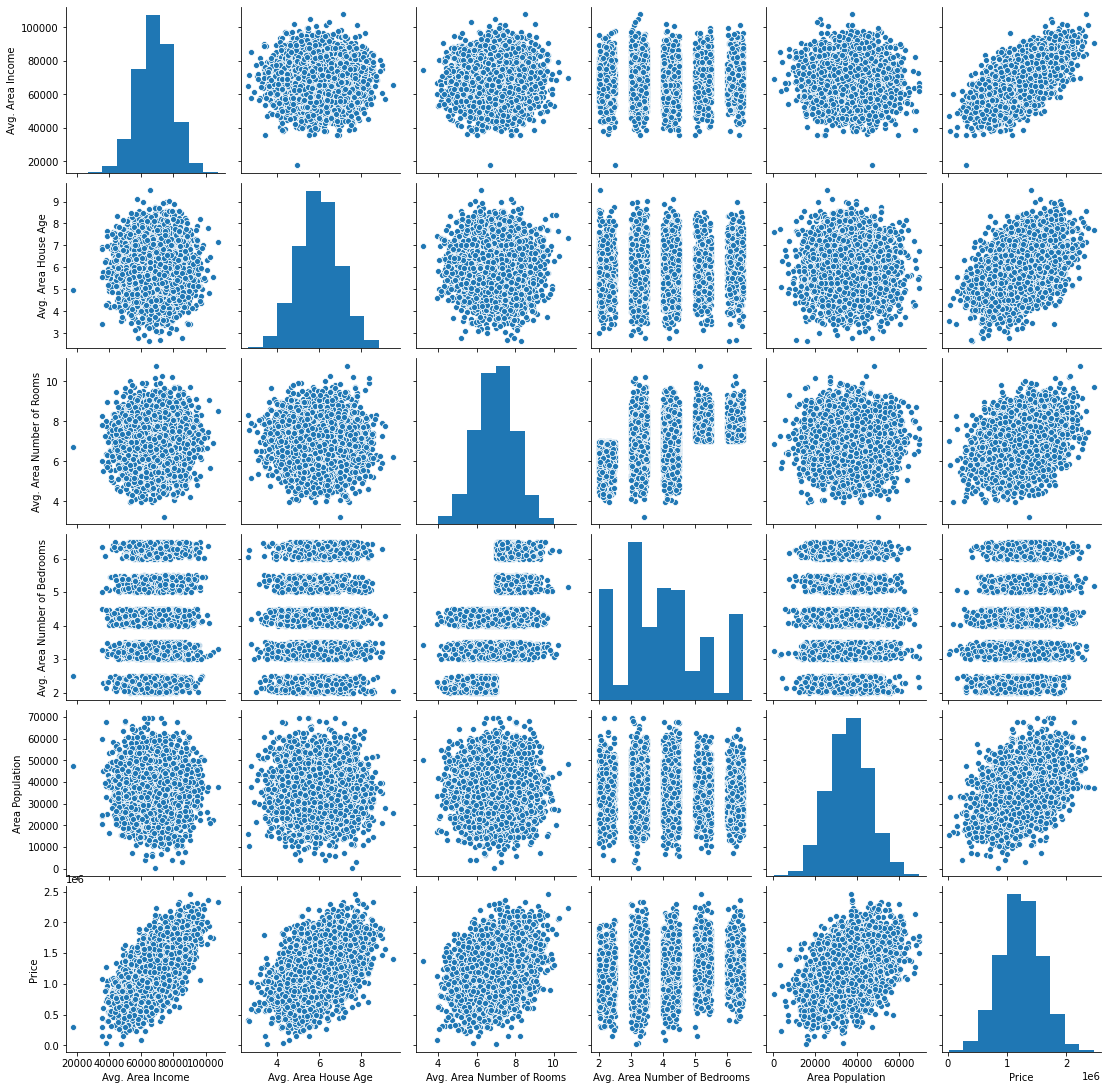

In [11]:
# pairplot can be used for data with small about of columns and rows
sns.pairplot(df)

<AxesSubplot:xlabel='Price'>

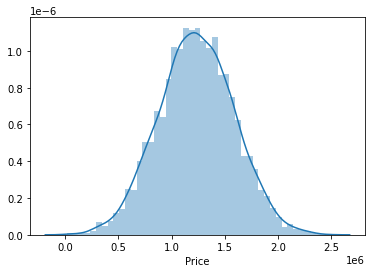

In [12]:
#check distribution of target column (what we want to predict)
sns.distplot(df['Price'])

<AxesSubplot:>

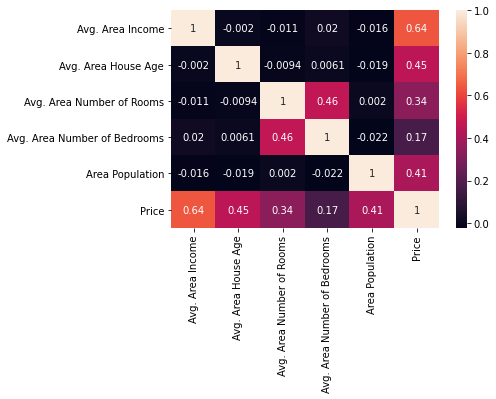

In [16]:
#heatmap of correlation of each of the columns
df.corr() #print correlation 

sns.heatmap(df.corr(),annot=True)

In [17]:
#ML model
#first we need to split data o X_train (features on which we train) and y which is target variable
#we toss out adress info cause we cannot process it with ML method

df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [19]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']] #features

In [20]:
y=df['Price'] #target variable

In [21]:
#test train split 
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=101)

In [24]:
#now we need to create and train the model
from sklearn.linear_model import LinearRegression

lm=LinearRegression() #creating LM object

In [25]:
lm.fit(X_train,y_train) #train of model with training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#evaluate the model, seeing the coeeficients
print(lm.intercept_)

-2640159.796851911


In [30]:
#coefficents
lm.coef_ #will make a dataframe of it

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [31]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [32]:
pd.DataFrame(lm.coef_,X_train.columns, columns=['Coeff'])

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [33]:
#we can repeat same process for real Boston data from sklearn
from sklearn.datasets import load_boston

boston=load_boston()

In [34]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [36]:
#check cout the description
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Predictions

In [37]:
#find prediction with unseen dataset
predictions= lm.predict(X_test)

In [38]:
predictions

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

In [39]:
y_test #contain correct prices of houses

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

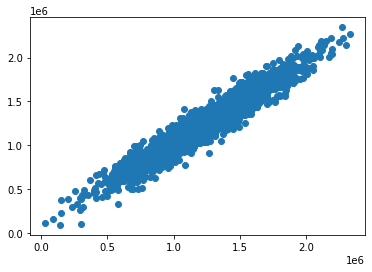

In [40]:
#check the difference btw predictions and y_test
plt.scatter(y_test,predictions) #perfect straight would be perfect predictions, this is good

<AxesSubplot:xlabel='Price'>

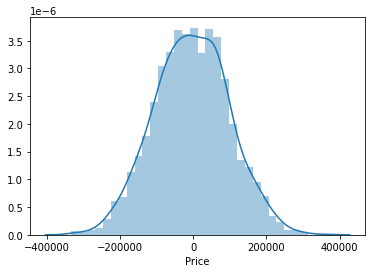

In [41]:
#histogram of residuals
sns.distplot((y_test-predictions)) #normaly distributed residuals- model was correct choice for data (linear regression in this case_)

In [42]:
#regression evaluation metrics
from sklearn import metrics

In [44]:
print('MAE: ' + str(metrics.mean_absolute_error(y_test,predictions)))
print('MSE: ' + str(metrics.mean_squared_error(y_test,predictions)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test,predictions))))

MAE: 82288.22251914957
MSE: 10460958907.209507
RMSE: 102278.82922291156


# Linear Regression Project

In [45]:
customer=pd.read_csv('/Users/Taninka/Downloads/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/Ecommerce Customers')
customer.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [46]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [47]:
customer.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


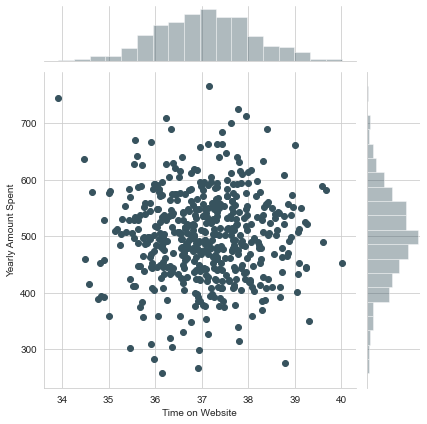

In [49]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customer)

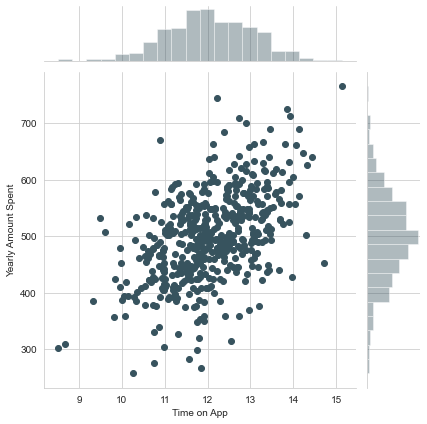

In [50]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customer)

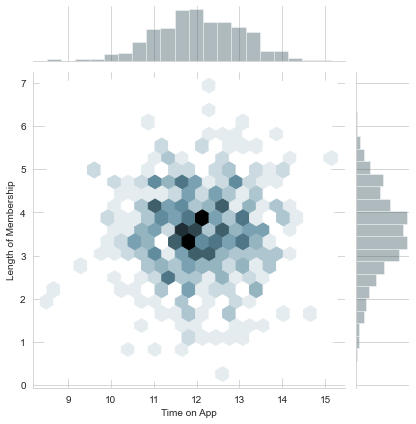

In [53]:
sns.jointplot(x='Time on App',y='Length of Membership',data=customer,kind='hex')

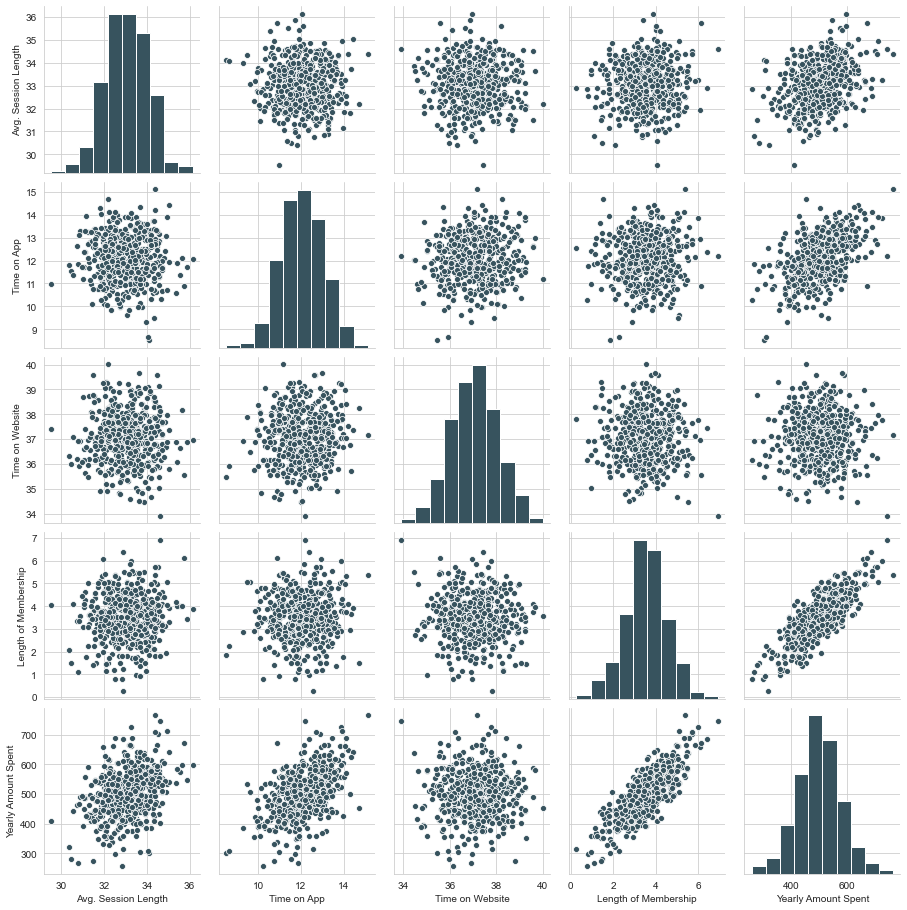

In [54]:
sns.pairplot(customer)

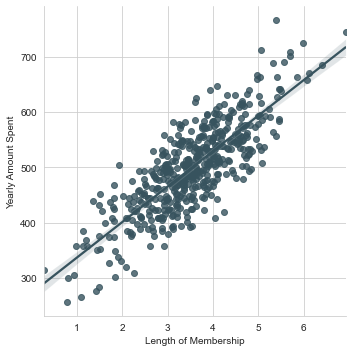

In [55]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customer)

In [56]:
customer.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [57]:
y=customer['Yearly Amount Spent']
X=customer[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)


In [59]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

In [60]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


In [65]:
predictions=lm.predict(X_test)

Text(0, 0.5, 'predictions')

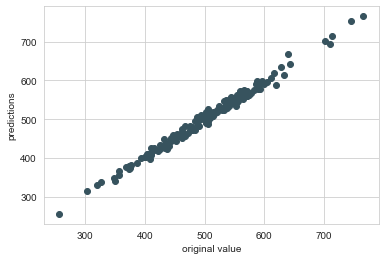

In [67]:
plt.scatter(y_test,predictions)
plt.xlabel('original value')
plt.ylabel('predictions')

In [68]:
from sklearn import metrics
print('MAE :' +str(metrics.mean_absolute_error(y_test,predictions)))
print('MSE :' +str(metrics.mean_squared_error(y_test,predictions)))
print('RMSE :' +str(np.sqrt(metrics.mean_squared_error(y_test,predictions))))

MAE :7.228148653430838
MSE :79.81305165097461
RMSE :8.933815066978642


<AxesSubplot:xlabel='Yearly Amount Spent'>

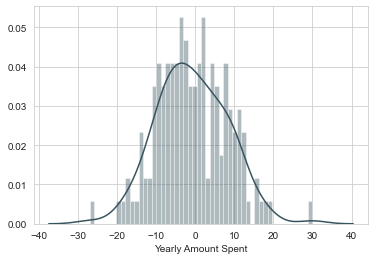

In [71]:
sns.distplot(y_test-predictions,bins=50)

In [75]:
coeffecients= pd.DataFrame(lm.coef_, X.columns)
coeffecients.columns=['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
